# vLLM server experiment results

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Experiment data
data = {
    "Experiment": [
        "Expt 1", "Expt 2", "Expt 3", "Expt 4",
        "Expt 5", "Expt 6", "Expt 7", "Expt 8"
    ],
    "Max num seqs": ["256", "128", "128", "256", "256", "256", "512", "256"],
    "KV Cache dtype": ["fp16", "fp16", "fp8", "fp8", "fp8", "fp8", "fp8", "fp8"],
    "Speculative decoding": [
        "None", "None", "None", "None",
        "suffix(16)", "suffix(12)", "suffix(12)", "suffix(8)"
    ],
    "Benchmark duration (s)": [214.32, 193.27, 127.85, 108.30, 77.71, 78.02, 77.22, 79.61],
    "Request throughput (req/s)": [2.33, 2.59, 3.91, 4.62, 6.43, 6.41, 6.47, 6.28],
    "Output token throughput (tok/s)": [857.63, 951.06, 1437.69, 1697.24, 2365.34, 2355.90, 2380.28, 2308.78],
    "Peak output token throughput (tok/s)": [1498.00, 1509.00, 2242.00, 2750.00, 529.00, 560.00, 505.00, 700.00],
    "Peak concurrent requests": [257, 257, 259, 261, 266, 266, 267, 266],
    "Total Token throughput (tok/s)": [1724.94, 1912.85, 2891.61, 3413.64, 4757.38, 4738.40, 4787.43, 4643.63],
    "Mean Time To First Token (ms)": [24821.90, 34028.43, 21939.51, 2724.31, 14662.15, 14731.48, 14537.99, 12164.28],
    "Mean Time Per Output Token (ms)": [180.52, 121.24, 77.63, 118.33, 38.98, 38.49, 38.42, 50.40],
    "Mean Inter-Token Latency (ms)": [178.79, 121.09, 77.54, 117.78, 323.24, 311.21, 317.72, 325.66],
}

df = pd.DataFrame(data)
df


,Experiment,Max num seqs,KV Cache dtype,Speculative decoding,Benchmark duration (s),Request throughput (req/s),Output token throughput (tok/s),Peak output token throughput (tok/s),Peak concurrent requests,Total Token throughput (tok/s),Mean Time To First Token (ms),Mean Time Per Output Token (ms),Mean Inter-Token Latency (ms)
0,Expt 1,256,fp16,None,214.32,2.33,857.63,1498.0,257,1724.94,24821.90,180.52,178.79
1,Expt 2,128,fp16,None,193.27,2.59,951.06,1509.0,257,1912.85,34028.43,121.24,121.09
2,Expt 3,128,fp8,None,127.85,3.91,1437.69,2242.0,259,2891.61,21939.51,77.63,77.54
3,Expt 4,256,fp8,None,108.30,4.62,1697.24,2750.0,261,3413.64,2724.31,118.33,117.78
4,Expt 5,256,fp8,suffix(16),77.71,6.43,2365.34,529.0,266,4757.38,14662.15,38.98,323.24
5,Expt 6,256,fp8,suffix(12),78.02,6.41,2355.90,560.0,266,4738.40,14731.48,38.49,311.21
6,Expt 7,512,fp8,suffix(12),77.22,6.47,2380.28,505.0,267,4787.43,14537.99,38.42,317.72
7,Expt 8,256,fp8,suffix(8),79.61,6.28,2308.78,700.0,266,4643.63,12164.28,50.40,325.66


In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_normalized = df.copy()
df_normalized[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
df_normalized

,Experiment,Max num seqs,KV Cache dtype,Speculative decoding,Benchmark duration (s),Request throughput (req/s),Output token throughput (tok/s),Peak output token throughput (tok/s),Peak concurrent requests,Total Token throughput (tok/s),Mean Time To First Token (ms),Mean Time Per Output Token (ms),Mean Inter-Token Latency (ms)
0,Expt 1,256,fp16,None,1.000000,0.000000,0.000000,0.442316,0.0,0.000000,0.705900,1.000000,0.408069
1,Expt 2,128,fp16,None,0.846462,0.062802,0.061360,0.447216,0.0,0.061359,1.000000,0.582829,0.175520
2,Expt 3,128,fp8,None,0.369292,0.381643,0.380954,0.773719,0.2,0.380955,0.613823,0.275932,0.000000
3,Expt 4,256,fp8,None,0.226696,0.553140,0.551414,1.000000,0.4,0.551414,0.000000,0.562350,0.162180
4,Expt 5,256,fp8,suffix(16),0.003574,0.990338,0.990188,0.010690,0.9,0.990188,0.381350,0.003941,0.990247
5,Expt 6,256,fp8,suffix(12),0.005835,0.985507,0.983988,0.024499,0.9,0.983990,0.383565,0.000493,0.941762
6,Expt 7,512,fp8,suffix(12),0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.377384,0.000000,0.967999
7,Expt 8,256,fp8,suffix(8),0.017433,0.954106,0.953042,0.086860,0.9,0.953045,0.301557,0.084307,1.000000


<Figure size 1400x800 with 0 Axes>

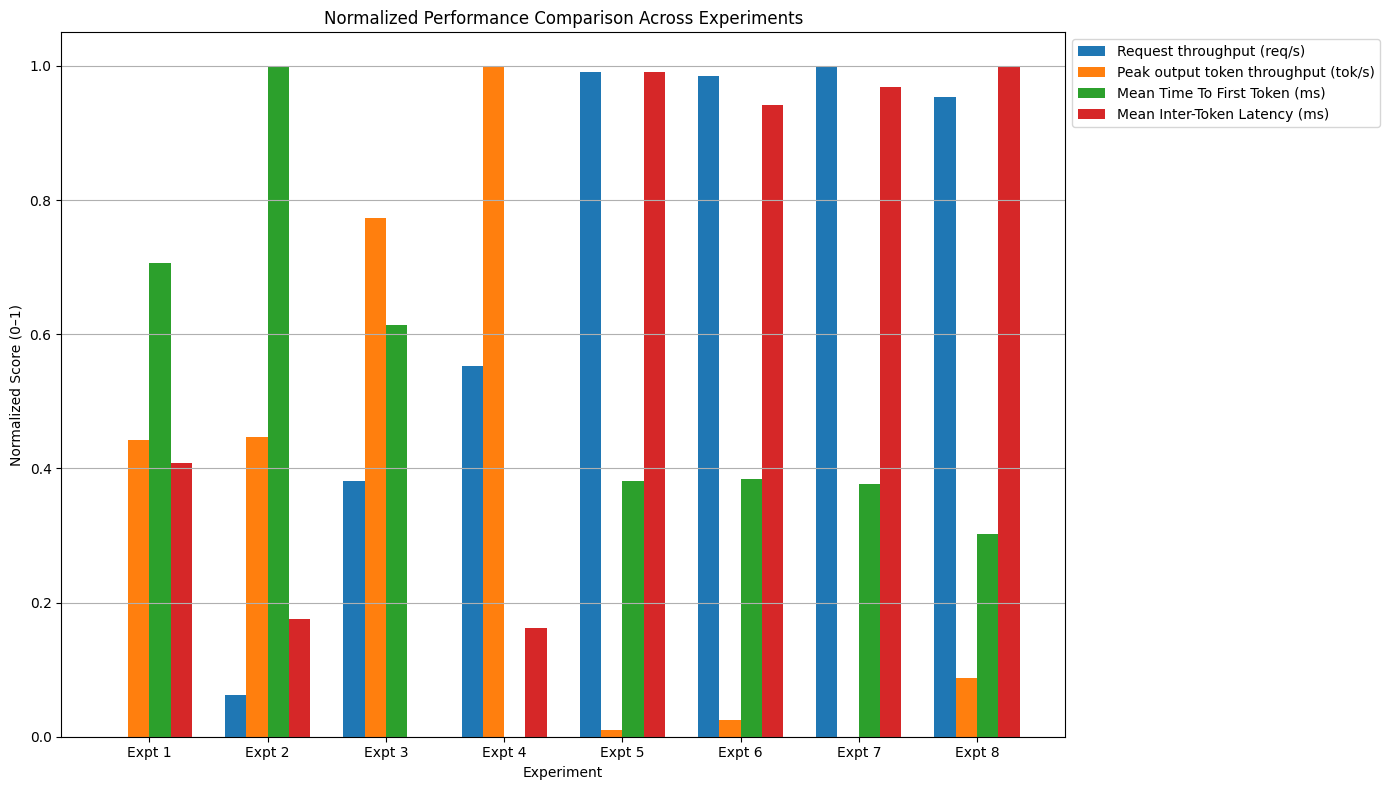

In [8]:
# plot graph
plt.figure(figsize=(14, 8))

plot_cols = [
    "Request throughput (req/s)",
    "Peak output token throughput (tok/s)",
    "Mean Time To First Token (ms)",
    "Mean Inter-Token Latency (ms)"
]

experiments = df["Experiment"]
num_experiments = len(experiments)
num_metrics = len(plot_cols)

x = np.arange(num_experiments)  # group positions
width = 0.18                    # width of each bar

fig, ax = plt.subplots(figsize=(14, 8))

for i, col in enumerate(plot_cols):
    ax.bar(
        x + i * width,
        df_normalized[col],
        width,
        label=col
    )

ax.set_xticks(x + width * (num_metrics - 1) / 2)
ax.set_xticklabels(experiments)
ax.set_xlabel("Experiment")
ax.set_ylabel("Normalized Score (0–1)")
ax.set_title("Normalized Performance Comparison Across Experiments")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.grid(axis="y")
plt.tight_layout()

plt.show()
